# Entropy Based Decision Tree Classification

In this question we use the Wisconsin Breast Cancer data set to explore decision tree learning in Python.

In [1]:
from sklearn.datasets import load_breast_cancer 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from matplotlib.pylab import rcParams
import numpy as np

Start off by importing the Wisconsin Breast Cancer dataset (`load_breast_cancer()`) and split into training and test sets

In [2]:
breast_cancer = load_breast_cancer() 
X = breast_cancer.data
Y = breast_cancer.target
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size=0.2)

Instantiate a decision tree classifier 
(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) using entropy as the criterion to select attributes. Fit the classifier and make a prediction on the training and on the test data.

In [3]:
dt = tree.DecisionTreeClassifier(criterion='entropy') 
model=dt.fit(Xtr, Ytr)
Ypredtr=model.predict(Xtr) 
Ypredtest=model.predict(Xtest)
accuracytr=metrics.accuracy_score(Ytr,Ypredtr)
accuracytest=metrics.accuracy_score(Ytest,Ypredtest)
print(f'training accuracy={accuracytr}, test accuracy={accuracytest}')

training accuracy=1.0, test accuracy=0.9649122807017544


One of the advantages of decision tree classifiers is that they are very interpretable. This is because the tree corresponds to a set of if-then rules identifying the class of an input given various constraints on the features. The structure of these rules can be seen by visualising the tree. You can use the following commands to extract a text-based representation.

In [4]:
from sklearn.tree import export_text 
features=breast_cancer['feature_names'].tolist()
r = export_text(model,feature_names=features) 
print(r)

|--- worst perimeter <= 105.95
|   |--- worst concave points <= 0.13
|   |   |--- area error <= 48.98
|   |   |   |--- worst texture <= 30.15
|   |   |   |   |--- class: 1
|   |   |   |--- worst texture >  30.15
|   |   |   |   |--- worst area <= 643.25
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst area >  643.25
|   |   |   |   |   |--- compactness error <= 0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- compactness error >  0.01
|   |   |   |   |   |   |--- class: 1
|   |   |--- area error >  48.98
|   |   |   |--- mean concavity <= 0.03
|   |   |   |   |--- class: 0
|   |   |   |--- mean concavity >  0.03
|   |   |   |   |--- class: 1
|   |--- worst concave points >  0.13
|   |   |--- worst texture <= 25.94
|   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |--- class: 1
|   |   |   |--- worst smoothness >  0.18
|   |   |   |   |--- class: 0
|   |   |--- worst texture >  25.94
|   |   |   |--- worst symmetry <= 0.27
|   |   |   |   |--- comp

Alternatively, we can also obtain a graphical representation. In the following we import the actual feature and class names for the Wisconsin data set which are then included as parameters in the ”plot-tree” command. The default will simply be to allocate numbers to features and classes. The first command resizes the figure to attempt to make the decision tree more readable.

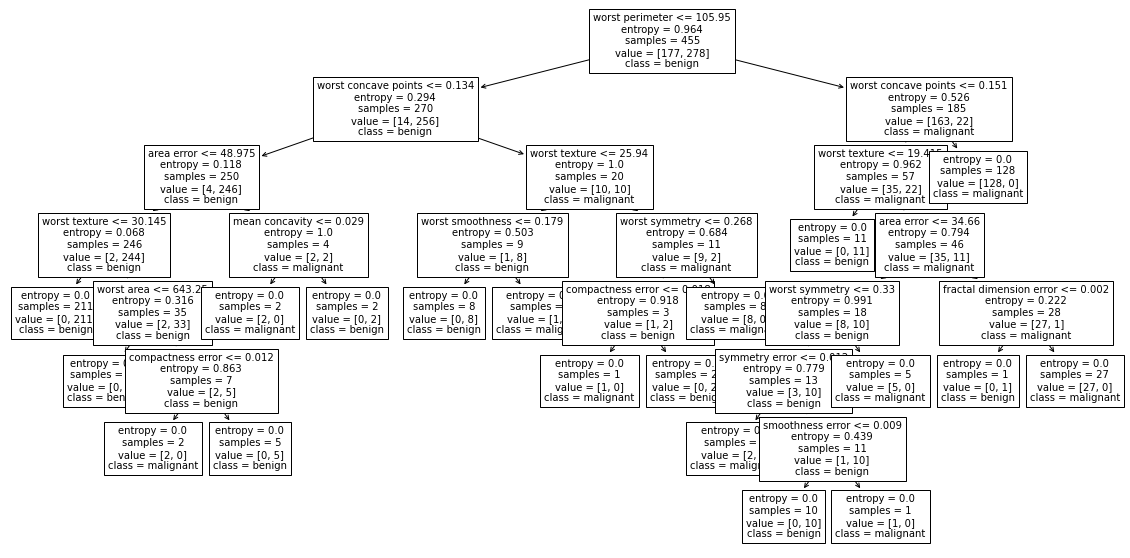

In [5]:
rcParams['figure.figsize'] = [20, 10]
classes=breast_cancer.target_names 
tree.plot_tree(model,feature_names=features,class_names=classes,fontsize=10)
plt.show()


Have a go at writing some of the branches of the tree in the form of if-then rules

A: 

if worst perimeter <= 114.45 and worst concave points <= 0.11 and area error <= 45.17 then 

    if worst texture <= 33.35
    
        class = 1
        
    else if worst texture >  33.35 then 
    
        if worst texture <= 33.56 then
        
            class = 0
            
        else if worst texture >  33.56
        
            class = 1
        

# Decision Trees Based on Gini Impurity
The Gini impurity can be used as an alternative to entropy when choosing on which attributes to split. If there are k classes and in a given branch B the proportion of training data of class i is pi then the Gini impurity for that branch is given by
$$ G(B) = 1 - \sum_{i=1}^k p_i^2 $$
We can use also use the Gini impurity to generate decision trees in sklearn. Instantiate a decision tree classifier using Gini impurity and plot it. How does the structure of the two trees differ?

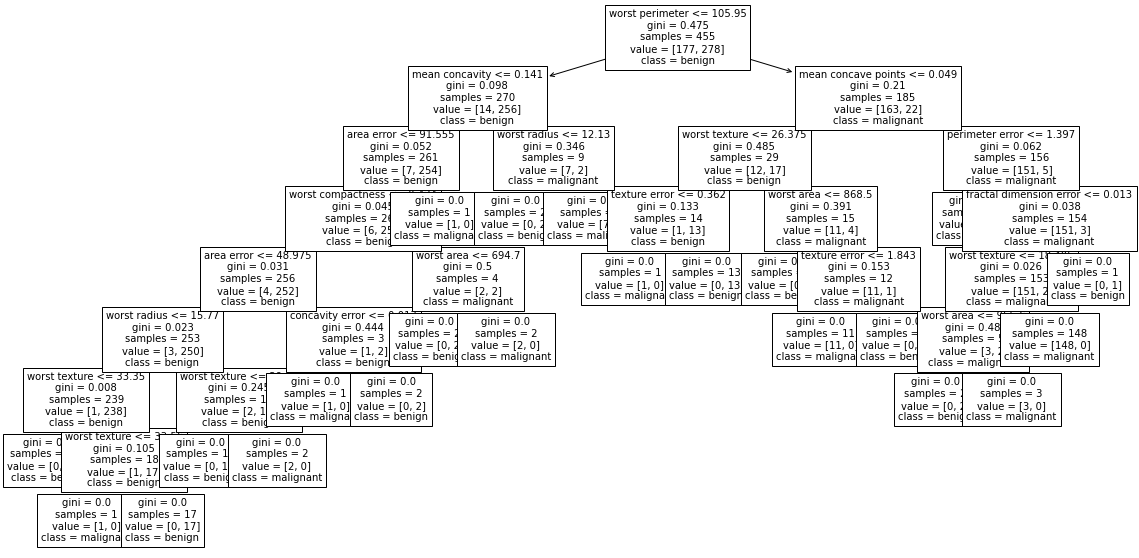

In [6]:
dt1 = tree.DecisionTreeClassifier(criterion='gini') 
model1=dt1.fit(Xtr, Ytr)
plt.figure() 
tree.plot_tree(model1,feature_names=features,class_names=classes,fontsize=10)
plt.show()

# Constraining Decision Trees

There are various constraints that we can put on decision tree learning which can affect overfitting and underfitting of the data. Perhaps the simplest is restricting the depth of the tree. Instantiate a decision tree classifier using entropy to select attributes and setting the parameter `max_depth` to 2. Fit its to the data and compare the accruacy with the full decision tree.

In [7]:
dt2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2) 
model2=dt2.fit(Xtr, Ytr)
Ypredtr=model2.predict(Xtr) 
Ypredtest=model2.predict(Xtest)
accuracytr=metrics.accuracy_score(Ytr,Ypredtr) 
accuracytest=metrics.accuracy_score(Ytest,Ypredtest)
print(f'training accuracy={accuracytr}, test accuracy={accuracytest}')

training accuracy=0.9208791208791208, test accuracy=0.9122807017543859


We note that while the accuracy has decreased slightly, it is still high. Looking at the figure, we can see that most of the points are classified using the features mean concave points <= 0.056, worst area <= 739.9, and worst concave points <=0.147

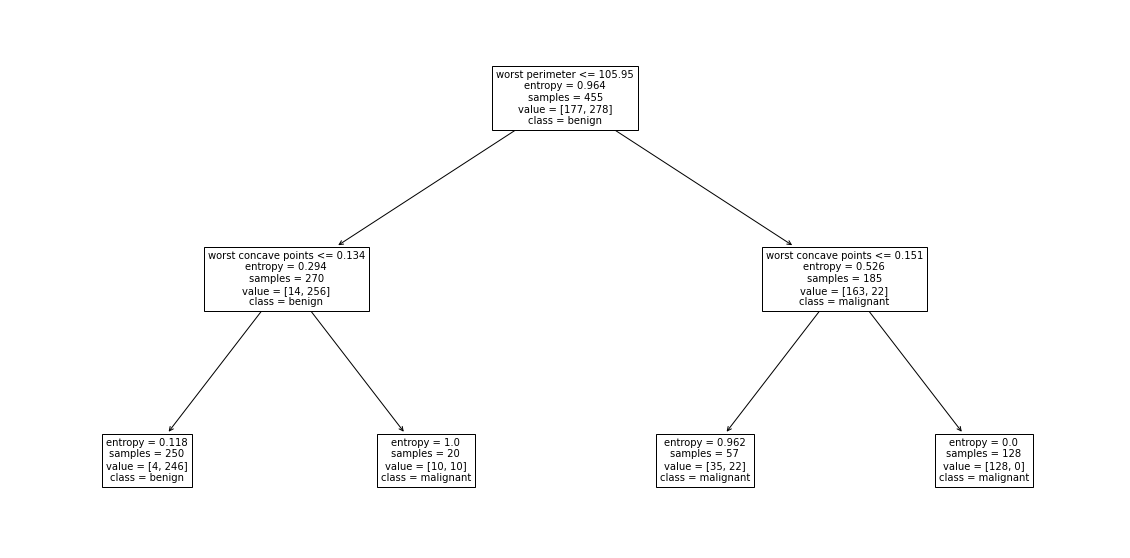

In [8]:
plt.figure() 
tree.plot_tree(model2,feature_names=features,class_names=classes,fontsize=10)
plt.show()

Another approach is to restrict the number of leaf nodes. In this case the tree is grown in a best first manner where best nodes are defined using relative reduction in impurity.

Try restricting the maximum number of leaf nodes (`max_leaf_nodes`) to 5.

In [9]:
dt3=tree.DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5) 
model3=dt3.fit(Xtr, Ytr)
Ypredtr=model3.predict(Xtr) 
Ypredtest=model3.predict(Xtest)
accuracytr=metrics.accuracy_score(Ytr,Ypredtr) 
accuracytest=metrics.accuracy_score(Ytest,Ypredtest)
print(f'training accuracy={accuracytr}, test accuracy={accuracytest}')


training accuracy=0.945054945054945, test accuracy=0.9298245614035088


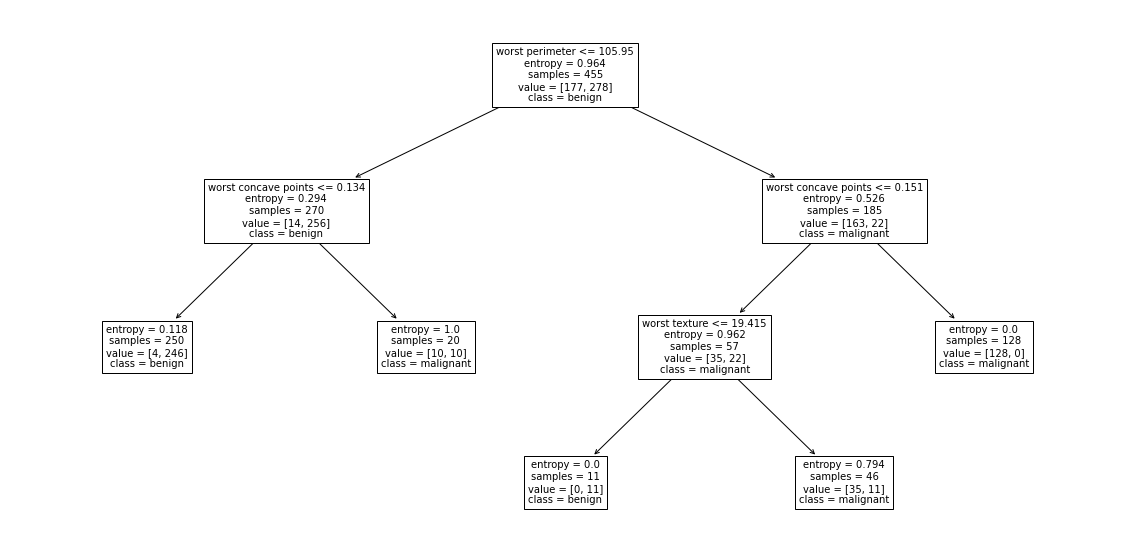

In [10]:
plt.figure() 
tree.plot_tree(model3,feature_names=features,class_names=classes,fontsize=10)
plt.show()

Yet another alternative is to set a threshold on impurity reduction. This means that a node will only split if the expected reduction in impurity is above a certain threshold. 

Look at what happens if you set `min_impurity_decrease` to 0.02

In [11]:
dt4=tree.DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=0.02) 
model4=dt4.fit(Xtr, Ytr)
Ypredtr=model4.predict(Xtr) 
Ypredtest=model4.predict(Xtest)
accuracytr=metrics.accuracy_score(Ytr,Ypredtr) 
accuracytest=metrics.accuracy_score(Ytest,Ypredtest)
print(f'training accuracy={accuracytr}, test accuracy={accuracytest}')

training accuracy=0.9494505494505494, test accuracy=0.9298245614035088


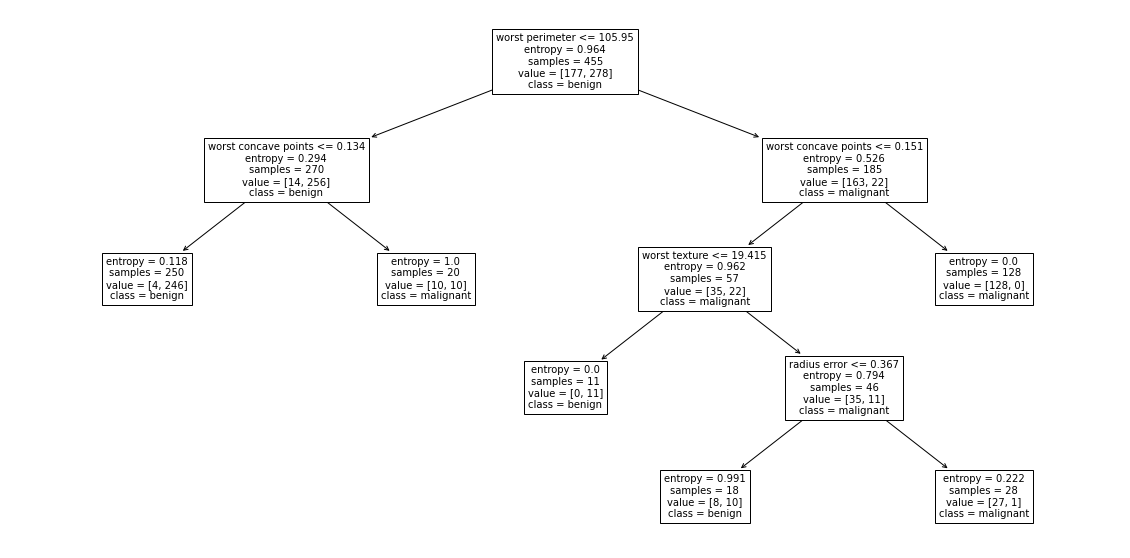

In [12]:
plt.figure() 
tree.plot_tree(model4,feature_names=features,class_names=classes,fontsize=10)
plt.show()

By investigating all of these different constraints comment on which are the most concise three that you can find which have good generalisation performance.

A: by setting max_leaf_nodes to 5, we can attain the same generalisation performance (i.e. accuracy on test set), as when setting min_impurity decrease to 0.02, but with a more concise tree.

# Decision Trees for Regression

We can also learn trees for regression problems. In this case each leaf node has an associated real value for the function along that branch. Splitting of nodes is then based on achieving an overall reduction in mean-squared error (rather than on impurity reduction).

We generate data for a simple regression problem where y = cos(x) but where there is noise associated with the y values recorded.

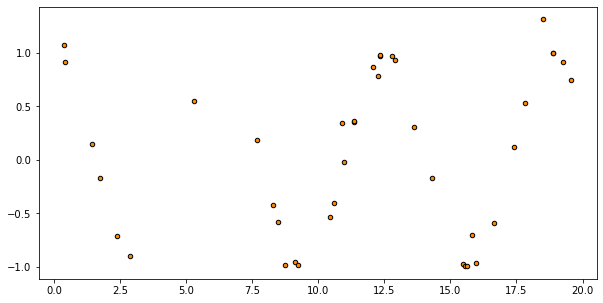

In [13]:
np.random.seed(0)
X = np.sort(20 * np.random.rand(40, 1), axis=0) 
y = np.cos(X).ravel()
y[::5] += 0.5 - np.random.rand(8)

rcParams['figure.figsize'] = [10, 5]
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
c="darkorange", label="data")

We can fit a regression tree using DecisionTreeRegressor as follows:

In [14]:
from sklearn.tree import DecisionTreeRegressor
rt = DecisionTreeRegressor(max_depth=2)
model=rt.fit(X, y) 
ypred=model.predict(X)

We can visualize the tree and see its accuracy as follows. Try experimenting with different max depth values and see how it impacts on performance.

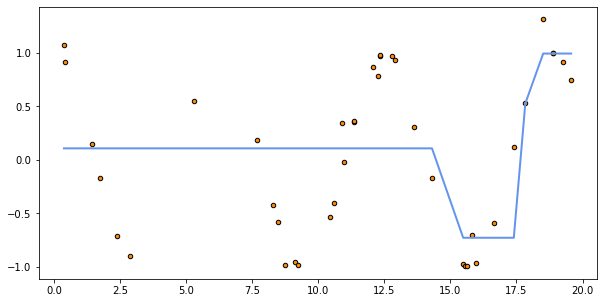

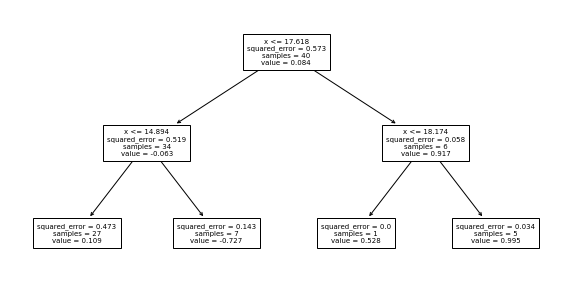

In [15]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
c="darkorange", label="data")
plt.plot(X, ypred, color="cornflowerblue",label="max_depth=2",
   linewidth=2)
plt.show()
plt.figure() 
tree.plot_tree(model,feature_names=['x','y'],fontsize=7)
plt.show()

We can also use this approach to learn a regression tree for the diabetes data set from sklearn. Instantiate a regression tree on the diabetes dataset with maximum depth 4. Split the data into a training and a test set. Fit the model on the training set and calculate the mean squared error on the test set. 

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_diabetes


In [17]:
rtdb = DecisionTreeRegressor(max_depth=5)
diabetes = load_diabetes()

diabetes_X=diabetes.data
diabetes_Y = diabetes.target

diabetes_X_train, diabetes_X_test, \
    diabetes_Y_train, diabetes_Y_test= train_test_split(diabetes_X, diabetes_Y, test_size=0.2,random_state=0)

In [18]:
modeldb=rtdb.fit(diabetes_X_train, diabetes_Y_train) 
diabetes_Y_pred_train = modeldb.predict(diabetes_X_train)
diabetes_Y_pred = modeldb.predict(diabetes_X_test)
print(f"mean squared error test={mean_squared_error(diabetes_Y_pred,diabetes_Y_test)}")
print(f"mean squared error training={mean_squared_error(diabetes_Y_pred_train,diabetes_Y_train)}")
features=diabetes['feature_names']
# plt.figure() 
# tree.plot_tree(modeldb,feature_names=features,fontsize=10)
# plt.show()

mean squared error test=4661.7313308671155
mean squared error training=1832.5242867398824


As is generally the case for regression problems we can visualize performance by plotting predicted against actual values and seeing how close they lie to the $y = x$ line.

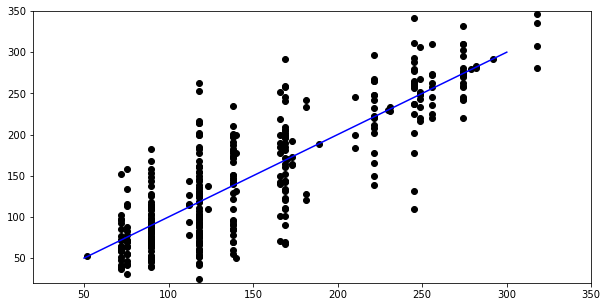

In [19]:
plt.figure()
plt.scatter(diabetes_Y_pred_train,diabetes_Y_train,color='black') 
x = np.linspace(50,300,100)
y=x
plt.plot(x, y,color='blue')
plt.ylim(20, 350)
plt.xlim(20, 350)
plt.show()

Try experimenting with different max depth values for the regression trees. What do these results tell you about the limitations of using trees for regression problems?

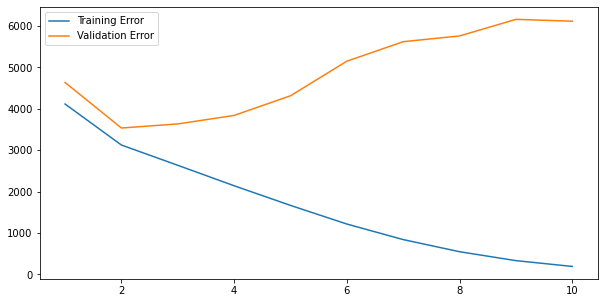

In [20]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

max_d = 10
mean_trn_mses = []
mean_val_mses = []
for d in range(max_d):
    trn_mses=[]
    val_mses=[]
    rtdb = DecisionTreeRegressor(max_depth=d+1)
    for train_index, val_index in kf.split(diabetes_X_train):
        Xtrn, Xval = diabetes_X_train[train_index], diabetes_X_train[val_index]
        ytrn, yval = diabetes_Y_train[train_index], diabetes_Y_train[val_index]
        rtdb.fit(Xtrn, ytrn)
        ytrn_pred = rtdb.predict(Xtrn)
        yval_pred = rtdb.predict(Xval)
        trn_mses.append(mean_squared_error(ytrn, ytrn_pred))
        val_mses.append(mean_squared_error(yval, yval_pred))
    mean_trn_mses.append(np.mean(trn_mses))
    mean_val_mses.append(np.mean(val_mses))

plt.plot(range(1, max_d+1), mean_trn_mses, label='Training Error')
plt.plot(range(1, max_d+1), mean_val_mses, label='Validation Error')
plt.legend()
plt.show()

We can see that the decision tree regressor overfits to the training data.